# **TSLA Price Prediction using ML LSTM**


In [ ]:
import pandas as pd

df = pd.read_csv('/MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,156.770004,157.770004,156.449997,157.699997,151.685181,18369400
1,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.493820,22622100
2,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.570099,21116200
3,2020-01-06,157.080002,159.100006,156.509995,159.029999,152.964508,20813700
4,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.569794,21634100
...,...,...,...,...,...,...,...
1051,2024-03-06,402.970001,405.160004,398.390015,402.089996,402.089996,22344100
1052,2024-03-07,406.119995,409.779999,402.239990,409.140015,409.140015,18718500
1053,2024-03-08,407.959991,410.420013,404.329987,406.220001,406.220001,17971700
1054,2024-03-11,403.760010,405.679993,401.260010,404.519989,404.519989,16120800


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2019-12-31,157.699997
1,2020-01-02,160.619995
2,2020-01-03,158.619995
3,2020-01-06,159.029999
4,2020-01-07,157.580002
...,...,...
1051,2024-03-06,402.089996
1052,2024-03-07,409.140015
1053,2024-03-08,406.220001
1054,2024-03-11,404.519989


In [ ]:
df['Date']

0       2019-12-31
1       2020-01-02
2       2020-01-03
3       2020-01-06
4       2020-01-07
           ...    
1051    2024-03-06
1052    2024-03-07
1053    2024-03-08
1054    2024-03-11
1055    2024-03-12
Name: Date, Length: 1056, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,2019-12-31,157.699997
1,2020-01-02,160.619995
2,2020-01-03,158.619995
3,2020-01-06,159.029999
4,2020-01-07,157.580002
...,...,...
1051,2024-03-06,402.089996
1052,2024-03-07,409.140015
1053,2024-03-08,406.220001
1054,2024-03-11,404.519989


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-7-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2019-12-31
1      2020-01-02
2      2020-01-03
3      2020-01-06
4      2020-01-07
          ...    
1051   2024-03-06
1052   2024-03-07
1053   2024-03-08
1054   2024-03-11
1055   2024-03-12
Name: Date, Length: 1056, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2019-12-31,157.699997
2020-01-02,160.619995
2020-01-03,158.619995
2020-01-06,159.029999
2020-01-07,157.580002
...,...
2024-03-06,402.089996
2024-03-07,409.140015
2024-03-08,406.220001


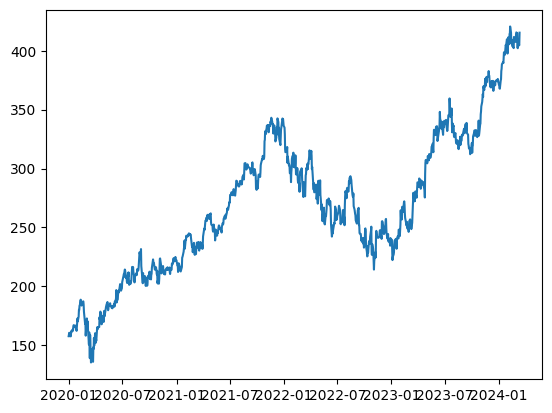

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df[['Close']])

<ipython-input-10-b3f69d0814cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df[['Close']])


In [ ]:
# Normalized df['Close'] data
df['Close']

Date
2019-12-31    0.078140
2020-01-02    0.088381
2020-01-03    0.081366
2020-01-06    0.082804
2020-01-07    0.077719
                ...   
2024-03-06    0.935258
2024-03-07    0.959983
2024-03-08    0.949742
2024-03-11    0.943780
2024-03-12    0.981517
Name: Close, Length: 1056, dtype: float64

# **Creating Sequences**


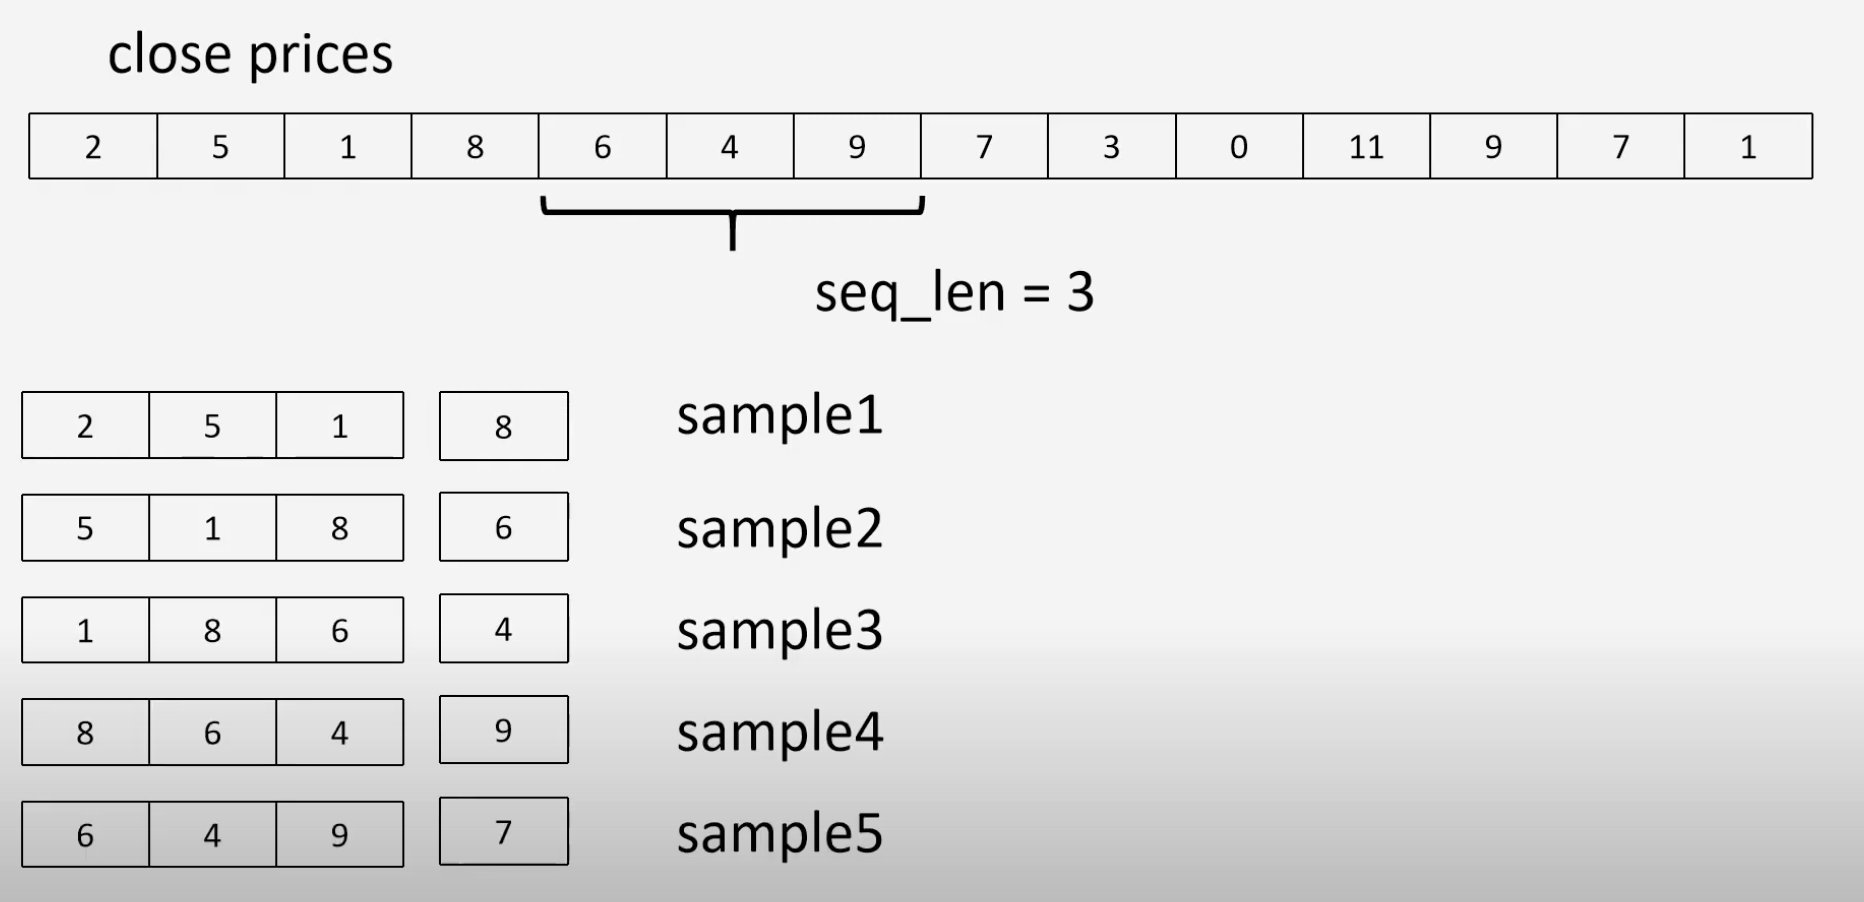

In [ ]:
import numpy as np

def create_sequences(data, sequence_length=3):

# Initialize Empty Lists for Input Sequences (Features, xs) and Targets (Labels, ys)

    xs = []
    ys = []
    for i in range(len(data) - sequence_length):

# slice of the data array from the current index i to i + sequence_length is taken.

        x = data[i:(i + sequence_length)]

# Target Value: 3 steps after sequence length
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 3
X, y = create_sequences(df['Close'].values, sequence_length)

In [ ]:
create_sequences(df['Close'], sequence_length=3)

(array([[0.0781398 , 0.08838073, 0.08136639],
        [0.08838073, 0.08136639, 0.08280434],
        [0.08136639, 0.08280434, 0.07771895],
        ...,
        [0.93722164, 0.93525763, 0.95998326],
        [0.93525763, 0.95998326, 0.94974227],
        [0.95998326, 0.94974227, 0.94378003]]),
 array([0.08280434, 0.07771895, 0.08652193, ..., 0.94974227, 0.94378003,
        0.98151724]))

Now we need to Reshape the element in Close to individual list for Consistency with Network Architecture

In [ ]:
#Reshaping Close Data for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
#Reshaped Close Data for LSTM
create_sequences(X, sequence_length=3)

(array([[[[0.0781398 ],
          [0.08838073],
          [0.08136639]],
 
         [[0.08838073],
          [0.08136639],
          [0.08280434]],
 
         [[0.08136639],
          [0.08280434],
          [0.07771895]]],
 
 
        [[[0.08838073],
          [0.08136639],
          [0.08280434]],
 
         [[0.08136639],
          [0.08280434],
          [0.07771895]],
 
         [[0.08280434],
          [0.07771895],
          [0.08652193]]],
 
 
        [[[0.08136639],
          [0.08280434],
          [0.07771895]],
 
         [[0.08280434],
          [0.07771895],
          [0.08652193]],
 
         [[0.07771895],
          [0.08652193],
          [0.09353628]]],
 
 
        ...,
 
 
        [[[0.97576553],
          [0.98228882],
          [0.98025471]],
 
         [[0.98228882],
          [0.98025471],
          [0.93722164]],
 
         [[0.98025471],
          [0.93722164],
          [0.93525763]]],
 
 
        [[[0.98228882],
          [0.98025471],
          [0.93722164]]

Now let's divide the Close data into Train & Test set (Using sklearn.model_selection module)

In [ ]:
# randomly divide data arrays or matrices into training and testing subsets.

from sklearn.model_selection import train_test_split

# Let's allocate 20% of the data to the test set, and consequently, 80% will be used for the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Data Visualizations and LSTM Model**

Developing LSTM Model
In the realm of deep learning, LSTM models play a crucial role in dealing with sequences where the order of data is vital, such as in time series prediction, natural language processing, and more. Below is a step-by-step breakdown of how the LSTM model is built using TensorFlow's Keras library:

1. Sequential Model Framework:

Sequential API from Keras is one of the simplest ways to build a model in TensorFlow. It allows layers to be added sequentially, where each layer automatically infers the shape of its input from the preceding layer, simplifying the model building process.
2. LSTM Layer:

Long Short-Term Memory (LSTM) Layers are a type of Recurrent Neural Network (RNN) suited for sequence prediction problems. They excel at learning from sequences by maintaining an internal state to remember past data, which helps them understand context and manage long-term dependencies in data sequences.
Configuration of the LSTM Layer:
The first LSTM layer in this model (LSTM(50, activation='relu', input_shape=(sequence_length, 1))) contains 50 units (neurons). This size can capture a reasonable level of complexity in the data.
activation='relu' is used to introduce non-linearity into the learning process, helping the model to learn more complex patterns in the data.
input_shape=(sequence_length, 1) specifies the expected shape of the input, where sequence_length is the number of time steps in each input sequence, and 1 indicates that there is one feature per time step (e.g., closing stock price).
3. Dense Layer:

Dense Layers, also known as fully connected layers, are a standard layer type that is used in many neural network architectures. Neurons in a dense layer have full connections to all activations in the previous layer, as seen in typical neural networks.
Role of the Dense Layer:
The Dense(1) layer here is used to output a single continuous value, which is common in regression tasks such as predicting the price of a stock for the next day. This layer takes the final state of the LSTM layer and transforms it into a single predictive output.
4. Compiling the Model:

model.compile(optimizer='adam', loss='mean_squared_error') configures the model for training.
optimizer='adam': Adam is an optimization algorithm that can handle sparse gradients on noisy problems. It is efficient and requires little configuration, making it a good default optimizer for many types of problems.
loss='mean_squared_error': This loss function calculates the mean of the squares of the differences between the predicted and actual values. It is widely used in regression problems, including stock price forecasts, where it helps in minimizing the prediction error.


In [ ]:
# Get the stock quote
import yfinance as yf
from datetime import datetime
ms_now = yf.download('MSFT', start='2012-01-01', end=datetime.now())
# Show the data
ms_now

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238750,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738585,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960730,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301880,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008333,59706800
...,...,...,...,...,...,...
2024-04-09,426.440002,427.739990,421.619995,426.279999,426.279999,12512300
2024-04-10,422.190002,424.029999,419.700012,423.260010,423.260010,16216600
2024-04-11,425.820007,429.369995,422.359985,427.929993,427.929993,17966400


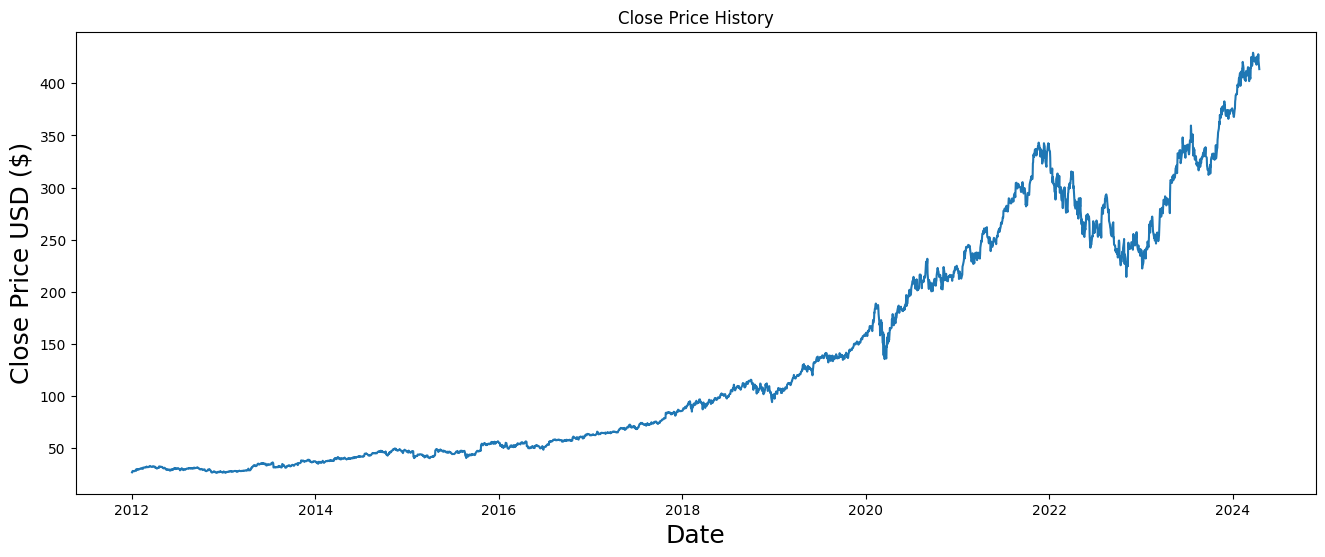

In [ ]:
# plotting close price history

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(ms_now['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = ms_now.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values
dataset

array([[ 26.77000046],
       [ 27.39999962],
       [ 27.68000031],
       ...,
       [427.92999268],
       [421.8999939 ],
       [413.64001465]])

**2**

In [ ]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2936

In [ ]:
# Normalizing the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[9.92554899e-04],
       [2.55582827e-03],
       [3.25061907e-03],
       ...,
       [9.96426793e-01],
       [9.81464017e-01],
       [9.60967790e-01]])

In [ ]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# define a function to create a training set to create input sequences and labels

def create_sequences(data, seq_length):
    for i in range(len(data) - seq_length):
        x_train.append(data[i:i+seq_length])
        y_train.append(data[i+seq_length])
    return np.array(x_train), np.array(y_train)

# create a sequence of training data with length 60
create_sequences(train_data, 60)


(array([[[0.00099255],
         [0.00255583],
         [0.00325062],
         ...,
         [0.01543424],
         [0.01526055],
         [0.01444168]],
 
        [[0.00255583],
         [0.00325062],
         [0.00431762],
         ...,
         [0.01526055],
         [0.01444168],
         [0.01426799]],
 
        [[0.00325062],
         [0.00431762],
         [0.0033995 ],
         ...,
         [0.01444168],
         [0.01426799],
         [0.01461538]],
 
        ...,
 
        [[0.76816379],
         [0.76255582],
         [0.73699754],
         ...,
         [0.736005  ],
         [0.7377916 ],
         [0.74947893]],
 
        [[0.76255582],
         [0.73699754],
         [0.74166256],
         ...,
         [0.7377916 ],
         [0.74947893],
         [0.75042187]],
 
        [[0.73699754],
         [0.74166256],
         [0.74545909],
         ...,
         [0.74947893],
         [0.75042187],
         [0.74786604]]]),
 array([[0.01426799],
        [0.01461538],
        [0.

In [ ]:
# reshape data for RNN
training_array_x = np.array(x_train)
x_train_reshaped = np.reshape(training_array_x, (training_array_x.shape[0], training_array_x.shape[1], 1))
x_train_reshaped.shape

# 2858 samples, 60 inputs / sequence, 1 feature

(2876, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# building the model

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(training_array_x.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model = Sequential()


In [ ]:
model.add(LSTM(128, return_sequences=True, input_shape=(training_array_x.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))

In [ ]:
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Create the testing data set
# Create a new training array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)

#Since the model was trained using scaled data, the predictions are in scaled format.
# This line inversely scales the predictions back to their original scale using the scaler used during training.
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

# The RMSE value obtained here serves as an evaluation metric to assess how well the model performs on the unseen test data.
# Lower RMSE values indicate better model performance.

5/5 [==============================] - 2s 71ms/step


345.12691139042056

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Building the LSTM model with dropout layers for regularization
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(Dropout(0.2))  # Dropout for regularization
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# Adjust 'batch_size' and 'epochs' as needed
model.fit(x_train_reshaped, np.array(y_train), batch_size=1, epochs=1, validation_split=0.1)

# Predicting and evaluating
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:", rmse)

5/5 [==============================] - 1s 15ms/step
RMSE: 11.218606256438377


<ipython-input-81-f3eff68caf5a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


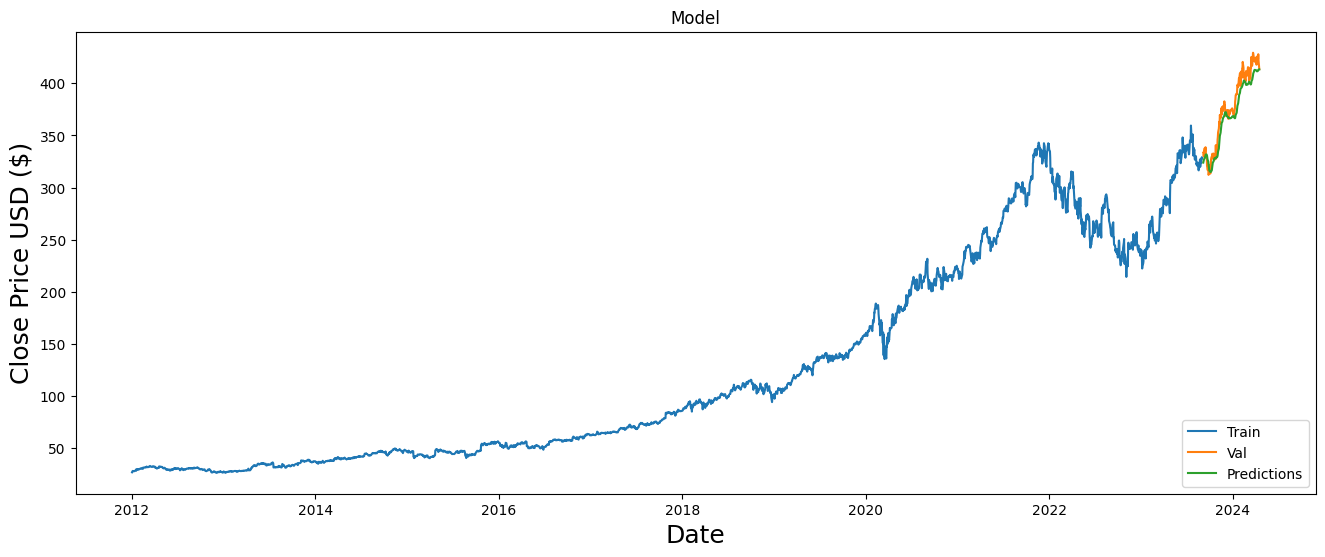

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right',)
plt.show()